# DATA PREPROCESSING - Part 1

Part 1 is designed to familiarize the team with the various data preprocessing techniques using various python libraries. As a team we followed the tutorial and implemented the processes in our own order to further our understanding.


#### We have attached data folder which includes all datasets which has path to the folder /data/. Download the folder and execute our code.

## Import Libraries

In [0]:
import pandas as pd
import numpy as np

## Read CSV File

In [0]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Add Column Headers

In [0]:
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

data.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Check The Shape of Dataset

In [0]:
print(data.shape)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

(699, 11)
Number of instances = 699
Number of attributes = 11


## Drop Columns

In [0]:
data = data.drop(['Sample code'],axis=1)

## Check for NULL Values in Dataset

In [0]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [0]:
data = data.replace('?',np.NaN)
print(data.shape)


(699, 10)


In [0]:
data.isnull().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [0]:
data.dtypes

Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

## Filling in Missing Values

In [0]:
data2 = data
data2 = data2.fillna(data2.median())
data2.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

## Display Outliers

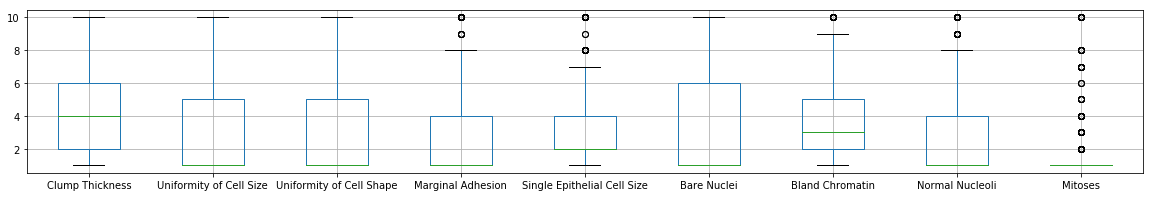

In [0]:
%matplotlib inline

data2 = data.drop(['Class'],axis=1)
data2['Bare Nuclei'] = pd.to_numeric(data2['Bare Nuclei'])
data2.boxplot(figsize=(20,3))

In [0]:
Z = (data2-data2.mean())/data2.std()
Z[20:25]
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3).sum(axis=1)==9) & ((Z <= 3).sum(axis=1)==9),:]
print('Number of rows after discarding missing values = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 699
Number of rows after discarding missing values = 632


## Remove Duplicates


In [0]:
# Show duplicates
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of duplicate rows = 236


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1,2,1,1,2
28,2,1,1,1,2,1,2,1,1,2


In [0]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
# Drop Duplicates
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 699
Number of rows after discarding duplicates = 463


## Shuffling Example

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/JessieVela/data/master/auto-mpg.csv')
dfMPG = df
dfMPG.head()
dfMPG = df.reindex(np.random.permutation(dfMPG.index))

dfMPG.reset_index(inplace=True, drop=True)
dfMPG.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,20.0,8,262.0,110,3221,13.5,75,1,chevrolet monza 2+2
1,17.0,8,260.0,110,4060,19.0,77,1,oldsmobile cutlass supreme
2,18.1,6,258.0,120,3410,15.1,78,1,amc concord d/l
3,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
4,19.8,6,200.0,85,2990,18.2,79,1,mercury zephyr 6


## sorting dataframes

In [0]:
dfMPG = dfMPG.sort_values(by='name',ascending=True)
dfMPG.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
357,13.0,8,360.0,175,3821,11.0,73,1,amc ambassador brougham
392,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
197,17.0,8,304.0,150,3672,11.5,72,1,amc ambassador sst
242,24.3,4,151.0,90,3003,20.1,80,1,amc concord
318,19.4,6,232.0,90,3210,17.2,78,1,amc concord


## Saving

In [0]:
import os
import pandas as pd
import numpy as np

path = "./data/"

filename_read = os.path.join(path,"auto-mpg.csv")
filename_write = os.path.join(path,"auto-mpg-shuffle.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])
df = df.reindex(np.random.permutation(df.index))
df.to_csv(filename_write,index=False)   # Specify index = false to not write row numbers
print("Done")

Done


## Dropping Fields

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/JessieVela/data/master/auto-mpg.csv', na_values=['NA', '?'])

print("Before drop: {}".format(df.columns))
df.drop('name', axis=1, inplace=True)
print("After drop: {}".format(df.columns))
df[0:5]

Before drop: Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')
After drop: Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


## Calculated Fields

In [0]:
import pandas as pd
import numpy as np

df.insert(1,'weight_kg',(df['weight']*0.45359237).astype(int))
df.head()

,mpg,weight_kg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,1589,8,307.0,130.0,3504,12.0,70,1
1,15.0,1675,8,350.0,165.0,3693,11.5,70,1
2,18.0,1558,8,318.0,150.0,3436,11.0,70,1
3,16.0,1557,8,304.0,150.0,3433,12.0,70,1
4,17.0,1564,8,302.0,140.0,3449,10.5,70,1


## Feature Normalization 

In [0]:
from scipy.stats import zscore

df['mpg'] = zscore(df['mpg'])
df.head()

,mpg,weight_kg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,-0.706439,1589,8,307.0,130.0,3504,12.0,70,1
1,-1.090751,1675,8,350.0,165.0,3693,11.5,70,1
2,-0.706439,1558,8,318.0,150.0,3436,11.0,70,1
3,-0.962647,1557,8,304.0,150.0,3433,12.0,70,1
4,-0.834543,1564,8,302.0,140.0,3449,10.5,70,1


## Missing Values

In [0]:
med = df['horsepower'].median()
df['horsepower'] = df['horsepower'].fillna(med)
df.head()

,mpg,weight_kg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,-0.706439,1589,8,307.0,130.0,3504,12.0,70,1
1,-1.090751,1675,8,350.0,165.0,3693,11.5,70,1
2,-0.706439,1558,8,318.0,150.0,3436,11.0,70,1
3,-0.962647,1557,8,304.0,150.0,3433,12.0,70,1
4,-0.834543,1564,8,302.0,140.0,3449,10.5,70,1


In [0]:
df.isnull().sum()

mpg             0
weight_kg       0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64

## Concatenating Rows and Columns

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/JessieVela/data/master/auto-mpg.csv', na_values=['NA', '?'])
col_horsepower = df['horsepower']
col_name = df['name']
result = pd.concat([col_name,col_horsepower],axis=1)
result.head()

,name,horsepower
0,chevrolet chevelle malibu,130.0
1,buick skylark 320,165.0
2,plymouth satellite,150.0
3,amc rebel sst,150.0
4,ford torino,140.0


In [0]:
col_horsepower = df['horsepower']
col_name = df['name']
result = pd.concat([col_name,col_horsepower])
result.head()

0    chevrolet chevelle malibu
1            buick skylark 320
2           plymouth satellite
3                amc rebel sst
4                  ford torino
dtype: object

In [0]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_


# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd


# Convert all missing values in the specified column to the median
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)


# Convert all missing values in the specified column to the default
def missing_default(df, name, default_value):
    df[name] = df[name].fillna(default_value)


# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) * (normalized_high - normalized_low) + normalized_low

## label encoding, one hot encoding, and creating X/Y

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/JessieVela/data/master/iris.csv', na_values=['NA', '?'])
df

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [0]:
encode_text_index(df,"species")
df

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/JessieVela/data/master/iris.csv', na_values=['NA', '?'])
encode_text_dummy(df,"species")
df

,sepal_l,sepal_w,petal_l,petal_w,species-Iris-setosa,species-Iris-versicolor,species-Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
5,5.4,3.9,1.7,0.4,1,0,0
6,4.6,3.4,1.4,0.3,1,0,0
7,5.0,3.4,1.5,0.2,1,0,0
8,4.4,2.9,1.4,0.2,1,0,0
9,4.9,3.1,1.5,0.1,1,0,0


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/JessieVela/data/master/iris.csv', na_values=['NA', '?'])
encode_text_index(df,"species")
x,y = to_xy(df,"species")
df

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [0]:
x

array([[ 5.0999999 ,  3.5       ,  1.39999998,  0.2       ],
       [ 4.9000001 ,  3.        ,  1.39999998,  0.2       ],
       [ 4.69999981,  3.20000005,  1.29999995,  0.2       ],
       [ 4.5999999 ,  3.0999999 ,  1.5       ,  0.2       ],
       [ 5.        ,  3.5999999 ,  1.39999998,  0.2       ],
       [ 5.4000001 ,  3.9000001 ,  1.70000005,  0.40000001],
       [ 4.5999999 ,  3.4000001 ,  1.39999998,  0.30000001],
       [ 5.        ,  3.4000001 ,  1.5       ,  0.2       ],
       [ 4.4000001 ,  2.9000001 ,  1.39999998,  0.2       ],
       [ 4.9000001 ,  3.0999999 ,  1.5       ,  0.1       ],
       [ 5.4000001 ,  3.70000005,  1.5       ,  0.2       ],
       [ 4.80000019,  3.4000001 ,  1.60000002,  0.2       ],
       [ 4.80000019,  3.        ,  1.39999998,  0.1       ],
       [ 4.30000019,  3.        ,  1.10000002,  0.1       ],
       [ 5.80000019,  4.        ,  1.20000005,  0.2       ],
       [ 5.69999981,  4.4000001 ,  1.5       ,  0.40000001],
       [ 5.4000001 ,  3.

## Missing Values and Outliers

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/JessieVela/data/master/auto-mpg.csv', na_values=['NA', '?'])
missing_median(df, 'horsepower')
print("Length before MPG outliers dropped: {}".format(len(df)))
remove_outliers(df,'mpg',2)
print("Length after MPG outliers dropped: {}".format(len(df)))

Length before MPG outliers dropped: 398
Length after MPG outliers dropped: 388


In [0]:
import pandas as pd
import io
import numpy as np
import os
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/JessieVela/data/master/iris.csv', na_values=['NA', '?'])
df[0:5]

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Training and Validation

In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['encoded_species'] = le.fit_transform(df['species'])

df[0:5]

,sepal_l,sepal_w,petal_l,petal_w,species,encoded_species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [0]:
x_train, x_test, y_train, y_test = train_test_split(df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']], df['encoded_species'], test_size=0.25, random_state=42)

In [0]:
x_train.shape

(112, 4)

In [0]:
y_train.shape

(112,)

In [0]:
x_test.shape

(38, 4)

In [0]:
y_test.shape

(38,)

## Aggregation

Text(0.5,1,'Daily Precipitation (variance = 0.0530)')

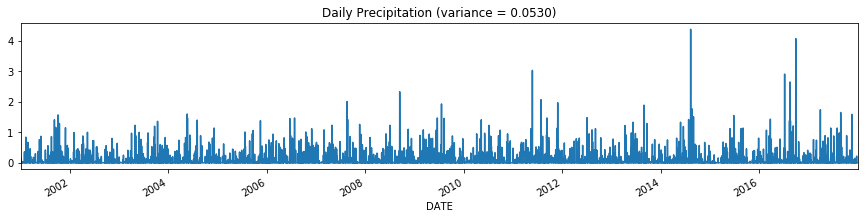

In [0]:
daily = pd.read_csv('https://raw.githubusercontent.com/JessieVela/data/master/DTW_prec.csv', header='infer')
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))

In [0]:
daily

DATE
2001-01-01    0.00
2001-01-02    0.00
2001-01-03    0.00
2001-01-04    0.04
2001-01-05    0.14
2001-01-06    0.00
2001-01-07    0.01
2001-01-08    0.00
2001-01-09    0.00
2001-01-10    0.00
2001-01-11    0.00
2001-01-12    0.00
2001-01-13    0.00
2001-01-14    0.02
2001-01-15    0.04
2001-01-16    0.00
2001-01-17    0.01
2001-01-18    0.00
2001-01-19    0.00
2001-01-20    0.00
2001-01-21    0.00
2001-01-22    0.00
2001-01-23    0.00
2001-01-24    0.00
2001-01-25    0.02
2001-01-26    0.01
2001-01-27    0.02
2001-01-28    0.00
2001-01-29    0.16
2001-01-30    0.36
              ... 
2017-12-02    0.00
2017-12-03    0.00
2017-12-04    0.04
2017-12-05    0.02
2017-12-06    0.00
2017-12-07    0.00
2017-12-08    0.00
2017-12-09    0.00
2017-12-10    0.00
2017-12-11    0.15
2017-12-12    0.00
2017-12-13    0.13
2017-12-14    0.00
2017-12-15    0.00
2017-12-16    0.01
2017-12-17    0.00
2017-12-18    0.01
2017-12-19    0.00
2017-12-20    0.00
2017-12-21    0.00
2017-12-22    0.00
2017-12

Text(0.5,1,'Monthly Precipitation (variance = 2.4241)')

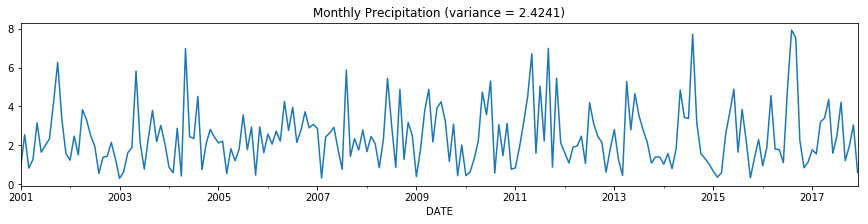

In [0]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Precipitation (variance = %.4f)' % (monthly.var()))

Text(0.5,1,'Annual Precipitation (variance = 23.6997)')

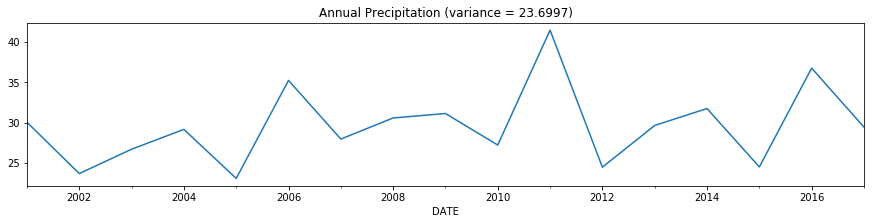

In [0]:
annual = daily.groupby(pd.Grouper(freq='A')).sum()
ax = annual.plot(kind='line',figsize=(15,3))
ax.set_title('Annual Precipitation (variance = %.4f)' % (annual.var()))

In [0]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [0]:
sample = data.sample(n=3)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
136,4,1,1,1,2,1,2,1,1,2
156,1,2,2,1,2,1,2,1,1,2
453,4,5,5,8,6,10,10,7,1,4


In [0]:
sample = data.sample(frac=0.01, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
584,5,1,1,6,3,1,1,1,1,2
417,1,1,1,1,2,1,2,1,1,2
606,4,1,1,2,2,1,1,1,1,2
349,4,2,3,5,3,8,7,6,1,4
134,3,1,1,1,3,1,2,1,1,2
502,4,1,1,2,2,1,2,1,1,2
117,4,5,5,10,4,10,7,5,8,4


In [0]:
sample = data.sample(frac=0.01, replace=True, random_state=1)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
37,6,2,1,1,1,1,7,1,1,2
235,3,1,4,1,2,NaN,3,1,1,2
72,1,3,3,2,2,1,7,2,1,2
645,3,1,1,1,2,1,2,1,1,2
144,2,1,1,1,2,1,2,1,1,2
129,1,1,1,1,10,1,1,1,1,2
583,3,1,1,1,2,1,1,1,1,2


## Discretization

1     145
2      50
3     108
4      80
5     130
6      34
7      23
8      46
9      14
10     69
Name: Clump Thickness, dtype: int64

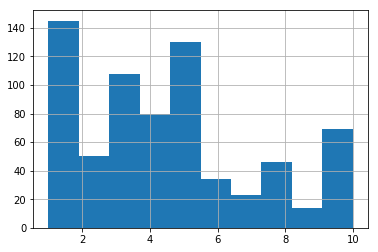

In [0]:
data['Clump Thickness'].hist(bins=10)
data['Clump Thickness'].value_counts(sort=False)

In [0]:
bins = pd.cut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.991, 3.25]    303
(3.25, 5.5]      210
(5.5, 7.75]       57
(7.75, 10.0]     129
Name: Clump Thickness, dtype: int64

In [0]:
bins = pd.qcut(data['Clump Thickness'],4)
bins.value_counts(sort=False)

(0.999, 2.0]    195
(2.0, 4.0]      188
(4.0, 6.0]      164
(6.0, 10.0]     152
Name: Clump Thickness, dtype: int64

## Principal Component Analysis

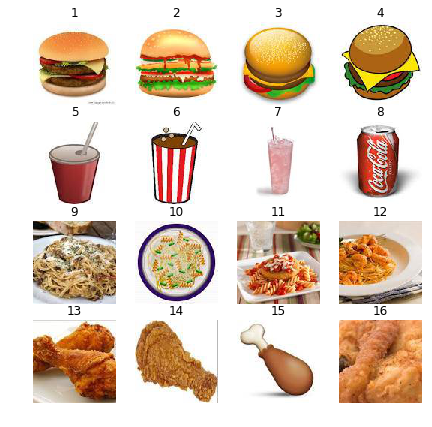

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from urllib.request import urlopen
from skimage import io

numImages = 16
fig = plt.figure(figsize=(7,7))
imgData = np.zeros(shape=(numImages,36963))

for i in range(1,numImages+1):
    img = io.imread('https://raw.githubusercontent.com/JessieVela/data/master/pics/Picture' + str(i) + '.jpg')
    ax = fig.add_subplot(4,4,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    imgData[i-1] = np.array(img.flatten()).reshape(1,img.shape[0]*img.shape[1]*img.shape[2])

In [0]:
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)

projected = pca.transform(imgData)
projected = pd.DataFrame(projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected['food'] = ['burger', 'burger','burger','burger','drink','drink','drink','drink',
                      'pasta', 'pasta', 'pasta', 'pasta', 'chicken', 'chicken', 'chicken', 'chicken']
projected

,pc1,pc2,food
1,-1576.756109,6640.629170,burger
2,-493.790896,6398.404235,burger
3,990.101781,7234.786180,burger
4,2189.881842,9051.353803,burger
5,-7843.044162,-1060.449111,drink
6,-8498.414279,-5438.180391,drink
7,-11181.848022,-5320.459482,drink
8,-6851.922930,1124.156791,drink
9,7635.129564,-5043.752879,pasta
10,-708.067071,-528.606973,pasta


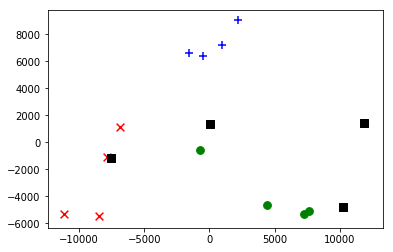

In [0]:
import matplotlib.pyplot as plt

colors = {'burger':'b', 'drink':'r', 'pasta':'g', 'chicken':'k'}
markerTypes = {'burger':'+', 'drink':'x', 'pasta':'o', 'chicken':'s'}

for foodType in markerTypes:
    d = projected[projected['food']==foodType]
    plt.scatter(d['pc1'],d['pc2'],c=colors[foodType],s=60,marker=markerTypes[foodType])

## PART 2: Candyhierarchy2017.csv (makingnoiseandhearingthings.com)
-------------------
This is a Candy hierarchy data for 2017 Boing Halloween candy hierarchy. It is collected by taking a survey. This dataset has more than 2400 surveyed entries with 120 attributes. Initially we preprocessed data to find what people in the United States, in a certain age group, think about Hershey’s milk chocolate.

-------------------

## Import Modules

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Define Defaults

In [0]:
countryDesired = 'USA'
ageMin = 15
ageMax = 30
filename = 'https://raw.githubusercontent.com/mattishii26/DataMiningRepo/master/candyhierarchy2017.csv' 
desired_Columns = ['Internal ID', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY','Q6 | HersheyÕs Milk Chocolate']
finalized_Columns = ['Q2: GENDER', 'Q3: AGE', 'Q6 | HersheyÕs Milk Chocolate']

## Read from CSV

In [0]:
df = pd.read_csv(filename, encoding='latin')
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers (a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [0]:
df.columns

Index(['Internal ID', 'Q1: GOING OUT?', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q5: STATE, PROVINCE, COUNTY, ETC', 'Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       ...
       'Q8: DESPAIR OTHER', 'Q9: OTHER COMMENTS', 'Q10: DRESS', 'Unnamed: 113',
       'Q11: DAY', 'Q12: MEDIA [Daily Dish]', 'Q12: MEDIA [Science]',
       'Q12: MEDIA [ESPN]', 'Q12: MEDIA [Yahoo]', 'Click Coordinates (x, y)'],
      dtype='object', length=120)

In [0]:
df.shape

(2460, 120)

# DATA PREPROCESSING

-----------------------------
Pull in the dataset that we only care about. Since I want to find out about what people in the United States, in a certain age group, think about Hershy's milk chocolate, I will filter out everything irrelevent.

------------


In [0]:
df = df[desired_Columns]
df.head()

,Internal ID,Q2: GENDER,Q3: AGE,Q4: COUNTRY,Q6 | HersheyÕs Milk Chocolate
0,90258773,NaN,NaN,NaN,NaN
1,90272821,Male,44,USA,JOY
2,90272829,Male,49,USA,NaN
3,90272840,Male,40,us,MEH
4,90272841,Male,23,usa,MEH


In [0]:
df.columns

Index(['Internal ID', 'Q2: GENDER', 'Q3: AGE', 'Q4: COUNTRY',
       'Q6 | HersheyÕs Milk Chocolate'],
      dtype='object')

In [0]:
df['Q6 | HersheyÕs Milk Chocolate'].unique()

array([nan, 'JOY', 'MEH', 'DESPAIR'], dtype=object)

------------------------
## Missing values & duplicates
Clean the data of null values and duplicates. I am choosing to drop all duplicate ID's, in the event someone took the questionaire twice and assume that the first entry(If there are duplicates) is the real entry.


------------------------

In [0]:
df = df.dropna()
df = df.drop_duplicates(subset = 'Internal ID', keep='first')
df.head()

,Internal ID,Q2: GENDER,Q3: AGE,Q4: COUNTRY,Q6 | HersheyÕs Milk Chocolate
1,90272821,Male,44,USA,JOY
3,90272840,Male,40,us,MEH
4,90272841,Male,23,usa,MEH
7,90272854,Male,33,canada,MEH
8,90272858,Male,40,Canada,JOY


--------------
## Transform data
Now I need to process the information about the Country. To do so, I will uppercase all countries, remove white space, and then regex to set the country to the desired country. 

--------------

In [0]:
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].str.upper()
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].str.strip()
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].replace(regex={'US$': countryDesired, 'UNITED STATES$': countryDesired})
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].loc[df['Q4: COUNTRY'] == countryDesired]
df = df.dropna()
df.head()

,Internal ID,Q2: GENDER,Q3: AGE,Q4: COUNTRY,Q6 | HersheyÕs Milk Chocolate
1,90272821,Male,44,USA,JOY
3,90272840,Male,40,USA,MEH
4,90272841,Male,23,USA,MEH
9,90272859,Female,53,USA,MEH
12,90272866,Male,64,USA,MEH


In [0]:
df['Q3: AGE'] = pd.to_numeric(df['Q3: AGE'], errors='coerce', downcast='integer')
df = df.dropna()
df = df[df['Q3: AGE'].between(ageMin, ageMax, inclusive=True)]
df.head()

,Internal ID,Q2: GENDER,Q3: AGE,Q4: COUNTRY,Q6 | HersheyÕs Milk Chocolate
4,90272841,Male,23.0,USA,MEH
74,90273000,Male,29.0,USA,DESPAIR
91,90273045,Male,28.0,USA,JOY
111,90273081,Male,25.0,USA,JOY
112,90273082,Male,29.0,USA,MEH


--------------
Ensure that Gender is limited to Male and Female. Some values were not Male/Female, such as "I don't know". To do this, I will just use pandas built in contains to filter. This will potentially exclude 'M', 'F'. From the dataset, Male and Female were used majority of the time.

---------------

In [0]:
df['Q2: GENDER'] = df['Q2: GENDER'].str.upper()
df['Q2: GENDER'] = df['Q2: GENDER'].str.strip()
df = df[df['Q2: GENDER'].str.contains('MALE')]
df.head()

,Internal ID,Q2: GENDER,Q3: AGE,Q4: COUNTRY,Q6 | HersheyÕs Milk Chocolate
4,90272841,MALE,23.0,USA,MEH
74,90273000,MALE,29.0,USA,DESPAIR
91,90273045,MALE,28.0,USA,JOY
111,90273081,MALE,25.0,USA,JOY
112,90273082,MALE,29.0,USA,MEH


# Finalize Preprocessing


To finalize preprocessing, I will again filter out columns I don't need and break it down into specific columns

In [0]:
df = df[finalized_Columns]
df.head()

,Q2: GENDER,Q3: AGE,Q6 | HersheyÕs Milk Chocolate
4,MALE,23.0,MEH
74,MALE,29.0,DESPAIR
91,MALE,28.0,JOY
111,MALE,25.0,JOY
112,MALE,29.0,MEH


# Usage of Processed Data

Creation of a bar chart to see which age group eats Hershy's Milk Chocolate the most

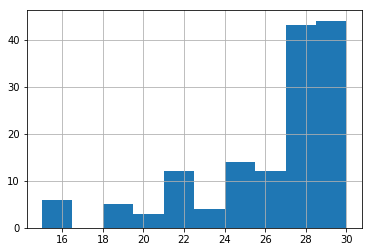

In [0]:
temp = df['Q3: AGE'].hist()
temp

From the data given, we can see that older people like eating Hershy's Milk Chocolate. This could also imply that there were more older people who took the survey.

# one hot encode categorical data

In [0]:
df_input = df[['Q3: AGE','Q2: GENDER']]
df_output = df[['Q6 | HersheyÕs Milk Chocolate']]

In [0]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [0]:
df_input.head()

,Q3: AGE,Q2: GENDER
4,23.0,MALE
74,29.0,MALE
91,28.0,MALE
111,25.0,MALE
112,29.0,MALE


In [0]:
df_output.head()

,Q6 | HersheyÕs Milk Chocolate
4,MEH
74,DESPAIR
91,JOY
111,JOY
112,MEH


In [0]:
encode_text_dummy(df_input,'Q2: GENDER')

In [0]:
encode_text_dummy(df_output,'Q6 | HersheyÕs Milk Chocolate')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [0]:
df_input.head()

,Q3: AGE,Q2: GENDER-FEMALE,Q2: GENDER-MALE
4,23.0,0,1
74,29.0,0,1
91,28.0,0,1
111,25.0,0,1
112,29.0,0,1


In [0]:
df_output.head()

,Q6 | HersheyÕs Milk Chocolate-DESPAIR,Q6 | HersheyÕs Milk Chocolate-JOY,Q6 | HersheyÕs Milk Chocolate-MEH
4,0,0,1
74,1,0,0
91,0,1,0
111,0,1,0
112,0,0,1


# Training and Test

Need to split the values between Training and Test data

In [0]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.25, random_state=42)


In [0]:
x_train.head()

,Q3: AGE,Q2: GENDER-FEMALE,Q2: GENDER-MALE
2062,29.0,0,1
923,28.0,1,0
2128,27.0,0,1
2220,29.0,1,0
1828,28.0,1,0


In [0]:
x_test.head()

,Q3: AGE,Q2: GENDER-FEMALE,Q2: GENDER-MALE
2113,29.0,0,1
409,20.0,0,1
1656,23.0,0,1
1851,25.0,1,0
1310,29.0,0,1


In [0]:
y_train.head()

,Q6 | HersheyÕs Milk Chocolate-DESPAIR,Q6 | HersheyÕs Milk Chocolate-JOY,Q6 | HersheyÕs Milk Chocolate-MEH
2062,0,1,0
923,0,0,1
2128,0,1,0
2220,0,0,1
1828,0,1,0


In [0]:
y_test.head()

,Q6 | HersheyÕs Milk Chocolate-DESPAIR,Q6 | HersheyÕs Milk Chocolate-JOY,Q6 | HersheyÕs Milk Chocolate-MEH
2113,0,0,1
409,0,1,0
1656,0,1,0
1851,1,0,0
1310,0,0,1


## spliting in other ratios 80:20

In [0]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(df_input, df_output, test_size=0.20)

In [0]:
x_train.head()

,Q3: AGE,Q2: GENDER-FEMALE,Q2: GENDER-MALE
1727,27.0,1,0
453,24.0,0,1
1099,27.0,1,0
2439,27.0,1,0
2102,22.0,1,0


# Online retail data
This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

----------
Data desciption :
InvoiceNo
StockCode
Description
Quantity
InvoiceDate
UnitPrice
CustomerID
Country

------------
Dataset used - Available on canvas (Online Retail.xlsx)

----

In [0]:
import collections
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os
import seaborn as sns

In [0]:
file_path = "./data/Online Retail.xlsx"
df1 = pd.read_excel(file_path)

In [0]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


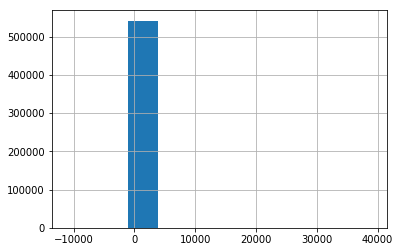

In [0]:
df1['UnitPrice'].hist()

In [0]:
df1.shape

(541909, 8)

In [0]:
df = df1.copy()

## Missing values and duplicate data

In [0]:
print('Number of duplicate rows is %d' % df.duplicated().sum())

Number of duplicate rows is 5268


In [0]:
# Leave original table in pristine condition
sample = df.copy()

print('The number of rows before drop duplicates is %d' % (sample.shape[0]))
# Ddrop duplicate values
sample = sample.drop_duplicates()

print ('The number of rows after drop duplicates is %d' % (sample.shape[0]))

The number of rows before drop duplicates is 541909
The number of rows after drop duplicates is 536641


## Columns in this dataset

In [0]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [0]:
df.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [0]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

## DROP CUSTOMER ID 

In [0]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [0]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


## Removing the NA's in the dataset row-wise

In [0]:
df.dropna(inplace=True)

## checking if null vlaues are removed

In [0]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

## Understanding the dataset in more descriptive manner

In [0]:
df.describe()

,Quantity,UnitPrice
count,540455.000000,540455.000000
mean,9.603129,4.623519
std,218.007598,96.889628
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


## From the above table we can see that minimum value of product's quantity is negative and it's not possible

In [0]:
df[(df['Quantity']<=0) | (df['UnitPrice']<0)].count()

InvoiceNo      9764
StockCode      9764
Description    9764
Quantity       9764
InvoiceDate    9764
UnitPrice      9764
Country        9764
dtype: int64

In [0]:
df=df[df['Quantity']>0]

In [0]:
df=df[df['UnitPrice']>=0]

In [0]:
df.shape

(530691, 7)

In [0]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Country                object
dtype: object

## Total amount spent on each transcations

In [0]:
df['total_amount']=df['Quantity']*df['UnitPrice']

In [0]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [0]:
df.shape

(530691, 8)

In [0]:
df['InvoiceNo'].unique()

array([536365, 536366, 536367, ..., 581585, 581586, 581587], dtype=object)

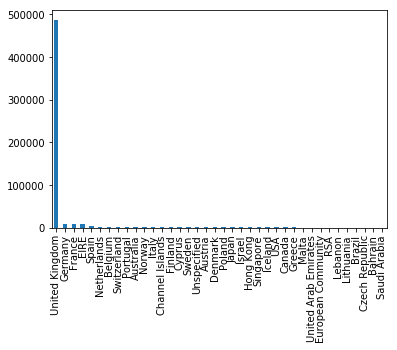

In [0]:
df.Country.value_counts().plot(kind='bar')

In [0]:
plt.show()

In [0]:
df.StockCode.nunique()

3925

In [0]:
sample = df.copy()

# Transform datetimeyear by splitting data seperatly to month , day ,year

In [0]:
sample['InvoiceDate'] = pd.to_datetime(sample.InvoiceDate)
sample.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
Country                 object
total_amount           float64
dtype: object

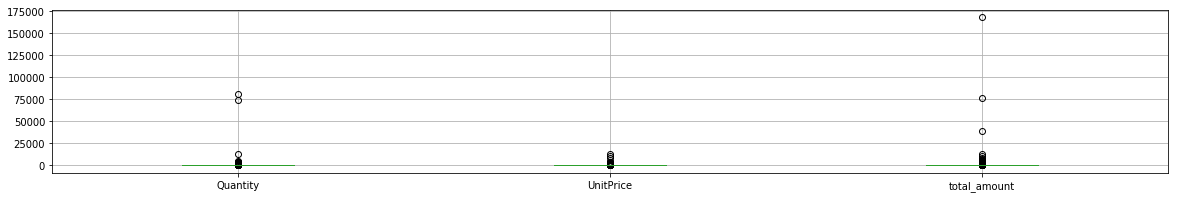

In [0]:
salesByDay = sample.copy()
salesByDay = salesByDay.drop(['InvoiceNo', 'Country'], axis=1)

%matplotlib inline
salesByDay.boxplot(figsize=(20,3))

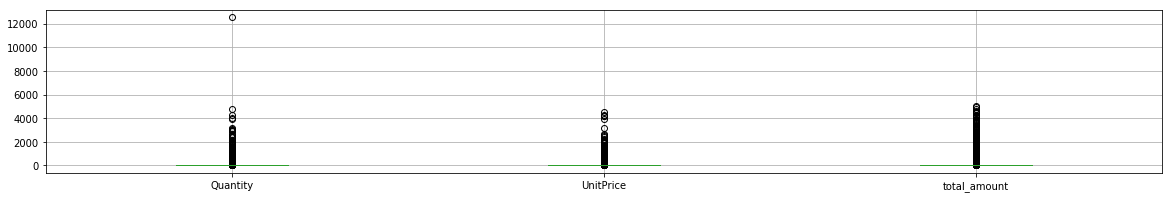

In [0]:
#Remove extreme outliers
salesByDay = salesByDay[salesByDay['total_amount']<6000]

%matplotlib inline
salesByDay.boxplot(figsize=(20,3))

# Investigate Daily, Monthly, and Annual Sales Patterns

Text(0.5,1,'Daily Sales')

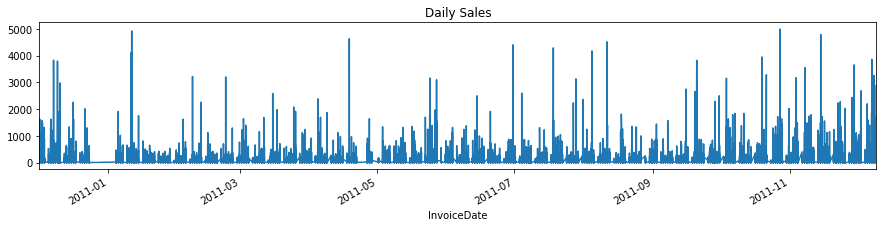

In [0]:
salesByDay.index = salesByDay['InvoiceDate']
salesByDay = salesByDay['total_amount']

ax = salesByDay.plot(kind='line', figsize=(15,3))
ax.set_title('Daily Sales')

Text(0.5,1,'Daily Sales')

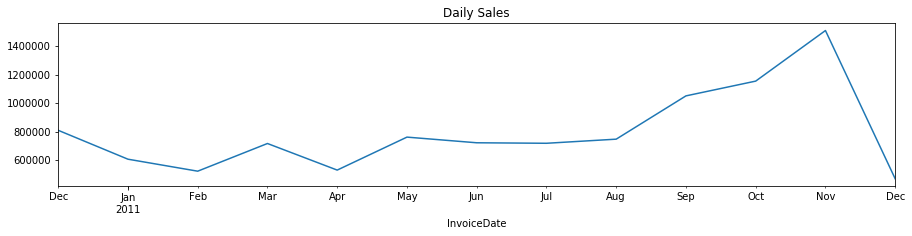

In [0]:
salesByMonth = salesByDay.groupby(pd.Grouper(freq='M')).sum()

ax = salesByMonth.plot(kind='line', figsize=(15,3))
ax.set_title('Daily Sales')

In [0]:
# point at which I stopped
sample['Year']=sample.InvoiceDate.dt.year

In [0]:
sample['Month']=sample.InvoiceDate.dt.month

In [0]:
sample['day']=sample.InvoiceDate.dt.day

In [0]:
sample['time'] = sample.InvoiceDate.dt.time

In [0]:
sample.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,total_amount,Year,Month,day,time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010,12,1,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,1,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010,12,1,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,1,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010,12,1,08:26:00


# Titanic data
This is the Titanic disaster data which has information of passengers traveling and information about their survival. It is splitted into two sets train.csv and test.csv

-----------------
Features in this dataset :

survival : Survival	0 = No, 1 = Yes
pclass: Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd		
Age	: Age in years	
sibsp:	# of siblings / spouses aboard the Titanic	
parch:	# of parents / children aboard the Titanic	
ticketTicket number	
fare: 	Passenger fare	
cabin:	Cabin number	
embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

--------------------

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Retrieve titanic_test.csv dataset
path = "./data/"
filename_read = os.path.join(path,"titanic_train.csv")
train_df = pd.read_csv(filename_read, na_values=['NA','?'])
# Check shape/how many rows and columns the dataset has
print(train_df.shape)

(891, 12)


In [0]:
# Retrieve titanic_test.csv dataset
path = "./data/"
filename_read = os.path.join(path,"titanic_test.csv")
test_df = pd.read_csv(filename_read, na_values=['NA','?'])
# Check shape/how many rows and columns the dataset has
print(test_df.shape)

(418, 11)


## train data

In [0]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# test data

In [0]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Check for missing values

In [0]:
print('Number of missing values in training data:')
train_df.isnull().sum().sort_values(ascending=False)

Number of missing values in training data:


Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [0]:
print('Number of missing values in testing data:')
test_df.isnull().sum().sort_values(ascending=False)

Number of missing values in testing data:


Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [0]:
train_data = train_df.copy()
test_data = test_df.copy()

## We choose to drop the Cabin attribute column since 329/420 records contain null values

In [0]:
train_data = train_data.drop(['Cabin'],axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
test_data = test_data.drop(['Cabin'],axis=1)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [0]:
# We choose to replace null Age and Fare attribute values with their median values
train_data['Age'] = train_data['Age'].fillna((train_data['Age'].median()))
test_data['Age'] = test_data['Age'].fillna((test_data['Age'].median()))

In [0]:
test_data['Fare'] = test_data['Fare'].fillna((test_data['Fare'].median()))

In [0]:
# All null/missing values are now removed from the dataset
train_data.isnull().sum().sort_values(ascending=False)

Embarked       2
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [0]:
train_data = train_data.dropna()

In [0]:
# All null/missing values are now removed from the dataset
train_data.isnull().sum().sort_values(ascending=False)

Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

In [0]:
# All null/missing values are now removed from the dataset
test_data.isnull().sum().sort_values(ascending=False)

Embarked       0
Fare           0
Ticket         0
Parch          0
SibSp          0
Age            0
Sex            0
Name           0
Pclass         0
PassengerId    0
dtype: int64

# Means and Standard Deviations

In [0]:
# Calculate means and standard deviations of the data attributes
print("Standard Deviation:")
print(train_data.std())
print("\nMean values:")
print(train_data.mean())


Standard Deviation:
PassengerId    256.998173
Survived         0.486260
Pclass           0.834700
Age             12.984932
SibSp            1.103705
Parch            0.806761
Fare            49.697504
dtype: float64

Mean values:
PassengerId    446.000000
Survived         0.382452
Pclass           2.311586
Age             29.315152
SibSp            0.524184
Parch            0.382452
Fare            32.096681
dtype: float64


In [0]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.576535
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.850103
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [0]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

# Encode textual data

In [0]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

In [0]:
encode_text_index(train_data,"Sex")

array(['female', 'male'], dtype=object)

In [0]:
train_data1 = train_data.copy()

In [0]:
mylist = ["Embarked"]
for i in mylist:
    encode_text_dummy(train_data,i)

In [0]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked-C,Embarked-Q,Embarked-S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1


# Split name in the data 

In [0]:
train_data.Name.str.split(',')

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
5                                    [Moran,  Mr. James]
6                             [McCarthy,  Mr. Timothy J]
7                      [Palsson,  Master. Gosta Leonard]
8      [Johnson,  Mrs. Oscar W (Elisabeth Vilhelmina ...
9                 [Nasser,  Mrs. Nicholas (Adele Achem)]
10                    [Sandstrom,  Miss. Marguerite Rut]
11                           [Bonnell,  Miss. Elizabeth]
12                     [Saundercock,  Mr. William Henry]
13                        [Andersson,  Mr. Anders Johan]
14               [Vestrom,  Miss. Hulda Amanda Adolfina]
15                   [Hewlett,  Mrs. (Mary D Kingcome) ]
16                               [Rice,  Master. Eugene]
17                       [Willi

In [0]:
# define a function that returns an element from a list based on position
def get_first_element(my_list):
    return my_list[0]

In [0]:
# apply the 'get_element' function and pass 'position' as a keyword argument
last_name = train_data.Name.str.split(',').apply(get_first_element)
last_name[0:5]

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

In [0]:
train_data['Last_name'] = last_name
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked-C,Embarked-Q,Embarked-S,Last_name
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,Futrelle
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,Allen


In [0]:
train_data.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [0]:
train_data.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [0]:
encode_text_index(train_data1,'Embarked')

array(['C', 'Q', 'S'], dtype=object)

In [0]:
train_data2 = train_data1.copy()

# Remove unwanted columns like name , ticket , PassengerID, Last_name

In [0]:
train_data2 = train_data2.drop(['PassengerId', 'Name', 'Ticket'],axis=1)
train_data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Normalization using Zscore

In [0]:
from scipy.stats import zscore
def Z_score(column):
    train_data2[column] = zscore(train_data2[column])

In [0]:
Z_score('Fare')

In [0]:
train_data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,-0.500240,2
1,1,1,0,38.0,1,0,0.788947,0
2,1,3,0,26.0,0,0,-0.486650,2
3,1,1,0,35.0,1,0,0.422861,2
4,0,3,1,35.0,0,0,-0.484133,2


# PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 4)
pca.fit(train_data2)
projected = pca.transform(train_data2)
numRows = train_data2.shape[0] + 1
projected = pd.DataFrame(projected, columns=['col1', 'col2', 'col3', 'col4'], index=range(1, numRows))
projected.head(15)

,col1,col2,col3,col4
1,-7.333754,-0.579950,0.744785,-0.088425
2,8.707459,1.445151,-1.020537,1.172258
3,-3.321637,-0.896972,-0.030772,-0.260391
4,5.703760,0.947624,-0.318812,-0.632188
5,5.679415,-1.088838,0.426020,-0.190708
6,-1.315527,-0.982172,-0.090741,0.671203
7,24.719245,0.208280,-0.246958,-0.682216
8,-27.371713,1.005617,1.666398,-0.005639
9,-2.343132,-0.155502,0.461262,-0.497902
10,-15.307640,0.496607,-0.929099,1.365190


# Visualizing data using seaborn library

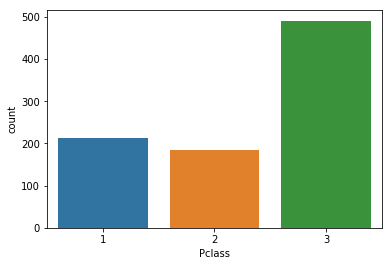

In [0]:
sns.countplot(x="Pclass", data=train_data)

In [0]:
plt.show()

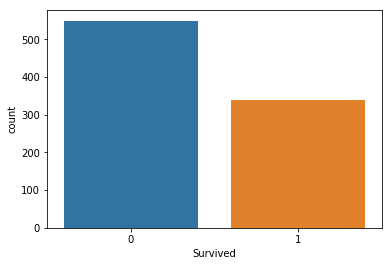

In [0]:
sns.countplot(x="Survived", data=train_data)

In [0]:
plt.show()

# City of Seattle Wage Data

Dataset vailable on canvas

In [0]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/mattishii26/DataMiningRepo/master/City_of_Seattle_Wage_Data.csv")
df.head()

,Department,Last Name,First Name,Job Title,Hourly Rate
0,Construction & Inspections,Jenkins,Eric,Housing/Zoning Inspector Supv,46.13
1,Construction & Inspections,McEachin,Shantel,Housing/Zoning Inspector,38.21
2,Construction & Inspections,Lum,Gregory,Housing/Zoning Inspector,38.21
3,Construction & Inspections,Patton,Valerie,Inspection Support Anlyst,41.89
4,Police Department,Rivera,Martin,Pol Lieut,79.32


## Sort Values
  

In [0]:
temp = df.sort_values(by='First Name')
temp.head()

,Department,Last Name,First Name,Job Title,Hourly Rate
9218,Legislative Department,Aldrich,A,Legislative Asst,42.0544
12131,Seattle City Light,Thompson,Aaren,Elctn-Con,50.3600
5877,Seattle City Light,McCartney,Aaron,Actg Tech III-BU,28.7400
11949,Fire Department,Scott,Aaron,Fireftr-Ap Drvr-90.46,45.1200
6366,Fire Department,Bocchetti,Aaron,Fireftr-MU-90.46 Hrs,41.6100


In [0]:
temp.Department.nunique()

35

## Calculated Field of Monthly Rate, at 160 hrs. Yearly rate with no time off


In [0]:
temp = df
temp.dropna()
temp.insert(5, 'Monthly Rate', (df['Hourly Rate '] * 160).astype(int))
temp.insert(6, 'Yearly Rate', (df['Monthly Rate'] * 52).astype(int))
df = temp
temp.head()

,Department,Last Name,First Name,Job Title,Hourly Rate,Monthly Rate,Yearly Rate
0,Construction & Inspections,Jenkins,Eric,Housing/Zoning Inspector Supv,46.13,7380,383760
1,Construction & Inspections,McEachin,Shantel,Housing/Zoning Inspector,38.21,6113,317876
2,Construction & Inspections,Lum,Gregory,Housing/Zoning Inspector,38.21,6113,317876
3,Construction & Inspections,Patton,Valerie,Inspection Support Anlyst,41.89,6702,348504
4,Police Department,Rivera,Martin,Pol Lieut,79.32,12691,659932


## Normalization of Hourly, Monthly, Yearly Rate

In [0]:
normalize = temp 
normalize['Hourly Rate '] = zscore(df['Hourly Rate '])
normalize['Monthly Rate'] = zscore(df['Monthly Rate'])
normalize['Yearly Rate'] = zscore(df['Yearly Rate'])
normalize.head()

,Department,Last Name,First Name,Job Title,Hourly Rate,Monthly Rate,Yearly Rate
0,Construction & Inspections,Jenkins,Eric,Housing/Zoning Inspector Supv,0.295911,0.295763,0.295763
1,Construction & Inspections,McEachin,Shantel,Housing/Zoning Inspector,-0.225567,-0.225628,-0.225628
2,Construction & Inspections,Lum,Gregory,Housing/Zoning Inspector,-0.225567,-0.225628,-0.225628
3,Construction & Inspections,Patton,Valerie,Inspection Support Anlyst,0.016736,0.016755,0.016755
4,Police Department,Rivera,Martin,Pol Lieut,2.481249,2.481329,2.481329


## Discretization

 1.103874     1
 1.966355     1
 1.117701     1
 5.433464     1
 0.859688     1
 1.557396     1
-0.468529     2
 1.604349     1
 1.262701     1
 0.314347     1
 0.133871     1
 0.677144     1
 0.323302     1
 0.624864     1
-0.803671     4
-0.865564    39
 0.181344     3
 0.131698     1
 0.867892     1
 0.744896     1
 0.766691     1
-0.791820     5
 2.240329     1
 3.561197     1
-0.623919     3
 0.840764     1
 0.320273     4
 0.391121     1
 0.817587     1
 0.487383     1
             ..
 0.837801     3
 1.592497     1
-0.620627     9
 0.457886     1
 0.688337    66
 1.311346     1
 1.333404     1
 0.213080     2
 1.508020     1
 2.309326     1
 1.703245     2
 1.373765     3
 0.347071     2
 0.885208     4
 0.302430     1
 0.192340     2
 0.467104     1
 0.596815     1
 0.462758     1
-0.443509     5
-0.469846     3
 0.987990     1
 0.108258     1
 2.028248     1
 0.729160     9
 1.512695     9
 0.807184     1
 2.637429     1
 3.015238     2
 1.380350     1
Name: Hourly Rate , Leng

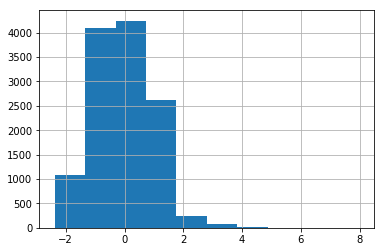

In [0]:
normalize['Hourly Rate '].hist(bins=10)
normalize['Hourly Rate '].value_counts(sort=False)

In [0]:
bins = pd.cut(normalize['Hourly Rate '], 4)
bins.value_counts(sort=False)

(-2.388, 0.212]    7198
(0.212, 2.801]     5072
(2.801, 5.391]      101
(5.391, 7.98]         5
Name: Hourly Rate , dtype: int64

In [0]:
bins = pd.qcut(normalize['Hourly Rate '], 4)
bins.value_counts(sort=False)

(-2.378, -0.746]     3096
(-0.746, -0.0247]    3111
(-0.0247, 0.691]     3093
(0.691, 7.98]        3076
Name: Hourly Rate , dtype: int64

## Outliers


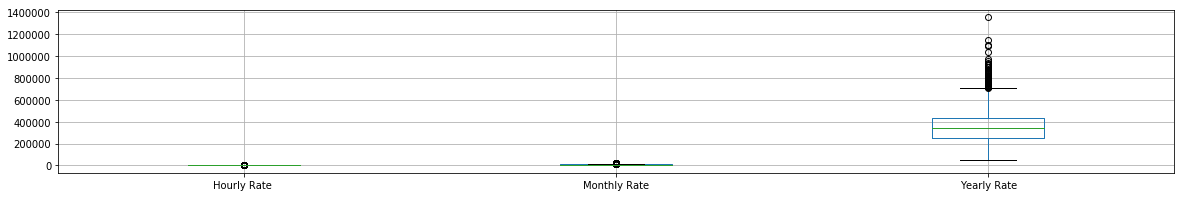

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/mattishii26/DataMiningRepo/master/City_of_Seattle_Wage_Data.csv")
ol = df[['Hourly Rate ']]
ol.insert(1, 'Monthly Rate', (ol['Hourly Rate '] * 160).astype(int))
ol.insert(2, 'Yearly Rate', (ol['Monthly Rate'] * 52).astype(int))

ol.boxplot(figsize=(20,3))

In [0]:
plt.show()

In [0]:
#Zscore
Z = (ol - ol.mean())/ol.std()
Z[20:25]

,Hourly Rate,Monthly Rate,Yearly Rate
20,0.616543,0.616721,0.616721
21,0.471035,0.471050,0.471050
22,-0.220949,-0.221093,-0.221093
23,0.229400,0.229500,0.229500
24,-0.342755,-0.342897,-0.342897


In [0]:
#Zscore Removed columns
print("# rows before discarding outliers %d" %  (Z.shape[0]))
Zn = Z.loc[((Z > -3).sum(axis=1)) & ((Z <= 3).sum(axis=1)),:]
print("# rows after discarding outliers %d" %  (Zn.shape[0]))

# rows before discarding outliers 12376
# rows after discarding outliers 12376
